LABORATORIO 02 (GRUPO 1 y GRUPO 2)
A partir de los cuadernillos revisados en clase, buscar un dataset, que contenga al menos 11 propiedades (n>10) y por lo menos 20000 ejemplos (m>=20000), para entrenar el modelo de regresión logística (clasificación) con este dataset, y realizar las respectivas predicciones que demuestren la efectividad del mismo. Se debe subir los cuadernillos modificados, el dataset y todo aquello que considere necesario para completar con el ejercicio.

Se debe aplicar Pandas para el preprocesamiento del dataset elegido.

Para la validacion del modelo se debe utilizar el 80% de los datos para entrenar y el 20% para probar (Lo datos que se elijan para prueba no deben ser tomados en cuenta en el entrenamiento).

Para la determinacion de los parametros theta se debe considerar aplicar un modelo de regresion logistica (clasificación), donde es importante incluir el respectivo grafico de costo para cada caso, el modelo, su entrenamiento y validacion debe estar en un solo cuadernillo, en los cuadros de texto se debe incluir la explicacion respectiva, eliminando todo el texto que se encuentra en los cuadernillos revisados en clase.

Se debe subir al repositorio github el cuadernillo e incluir la direccion del repositorio y el cuadernillo en ecampus, ademas de una explicación suficiente del trabajo realizado.

  NOMBRE: LOAIZA CORONADO RODRIGO JAIRO <br>
  CARRERA: INGENIERIA DE SISTEMAS <BR>
  FECHA: 12/03/2024 <BR>

In [3]:
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [7]:
#Importamos los datos desde el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# libreria pandas para leer el dataset.
dataset = pd.read_csv('/content/drive/MyDrive/SIS420 Inteligencia Artificial/machine learning/datasets/ecomUserChurnData1.csv', delimiter=',')

#Imprimimos el dataset.
dataset

,visitorid,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,...,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int,time_to_tran,int_cat1_n,target_class
0,89,23,16.000000,0.000000,0.000000,39,2,0.051282,3,1.500000,...,7.000000,0.000000,11.000000,7.071068,0.500000,2.866667,1.911111,-1,0,1
1,251,23,61.000000,0.000000,0.000000,85,2,0.023529,2,1.000000,...,6.000000,1.414214,13.500000,2.121320,1.000000,0.000000,0.000000,-1,0,1
2,270,14,0.100000,0.300000,3.000000,21,11,0.523810,13,1.181818,...,7.454546,0.522233,12.636364,4.342182,0.363636,1.104545,0.934615,-1,0,1
3,298,11,13.000000,0.000000,0.000000,24,2,0.083333,4,2.000000,...,7.500000,0.707107,11.500000,4.949748,0.000000,0.508333,0.254167,-1,0,1
4,474,16,26.000000,0.000000,0.000000,43,2,0.046512,2,1.000000,...,7.000000,0.000000,19.500000,2.121320,0.500000,0.000000,0.000000,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49353,1406824,14,73.000000,0.000000,0.000000,87,2,0.022989,2,1.000000,...,6.500000,2.121320,10.500000,2.121320,0.000000,0.000000,0.000000,-1,0,1
49354,1406906,19,13.000000,0.000000,0.000000,32,2,0.062500,4,2.000000,...,7.000000,0.000000,12.000000,5.656854,0.000000,4.016667,2.008333,-1,0,1
49355,1406914,21,0.666667,0.942809,1.414214,23,4,0.173913,14,3.500000,...,7.000000,0.000000,13.250000,2.629955,0.750000,6.362500,1.817857,-1,0,1
49356,1407221,1,0.000000,0.000000,-1.000000,2,2,1.000000,2,1.000000,...,8.000000,0.000000,14.500000,7.778174,1.000000,0.000000,0.000000,-1,0,1


In [9]:
# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

#Separamos en X_test los datos, pero dropeando (Y) 'target_class'
X_test = test_dataset.drop(['target_class'], axis=1).values

#Separamos en y_test los datos, pero solo cargando la columna de 'target_class', ya que esa sera nuestra y
y_test = test_dataset['target_class'].values

# tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'target_class' para y_train
X_train = train_dataset.drop(['target_class'], axis=1).values
y_train = train_dataset['target_class'].values
m_train = len(y_train)


In [102]:

# Imprimir las primeras 10 instancias con 26 columnas y la variable Y
print('{:>12s}{:>8s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'visitorid', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv', 'user_rec', 'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n', 'tran_n_r', 'rev_sum', 'rev_sum_r', 'major_spend_r', 'int_cat_n_avg', 'int_itm_n_avg', 'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r', 'ses_len_avg', 'time_to_int', 'time_to_tran', 'int_cat1_n', 'target_class'
))
print('-' * 366)

for i in range(10):
    print('{:12.3f}{:8.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_train[i, 0], X_train[i, 1], X_train[i, 2], X_train[i, 3], X_train[i, 4], X_train[i, 5], X_train[i, 6], X_train[i, 7], X_train[i, 8], X_train[i, 9], X_train[i, 10], X_train[i, 11], X_train[i, 12], X_train[i, 13], X_train[i, 14], X_train[i, 15], X_train[i, 16], X_train[i, 17], X_train[i, 18], X_train[i, 19], X_train[i, 20], X_train[i, 21], X_train[i, 22], X_train[i, 23], X_train[i, 24], X_train[i, 25], y_train[i]
    ))




   visitorid ses_recses_rec_avgses_rec_sdses_rec_cv  user_rec     ses_n   ses_n_r     int_n   int_n_r    tran_n  tran_n_r   rev_sum rev_sum_rmajor_spend_rint_cat_n_avgint_itm_n_avgses_mo_avg ses_mo_sdses_ho_avg ses_ho_sdses_wknd_rses_len_avgtime_to_inttime_to_tranint_cat1_ntarget_class
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1249152.000   4.000     6.000     0.000     0.000    10.000     2.000     0.200     4.000     2.000     0.000     0.000     0.000     0.000     0.000     1.500     2.000     8.000     0.000    13.000     4.243     0.000     3.450     1.725    -1.000     2.000     0.000
 1055121.000   1.000     0.700     2.100     3.000     9.000    11.000     

# NORMALIZACION

In [11]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [12]:
# Imprimir los valores normalizados de las características para las primeras 10 instancias
X_norm, mu, sigma= featureNormalize(X_train)
# Imprimir las primeras 10 instancias con 26 columnas y la variable Y
print('{:>12s}{:>8s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'visitorid', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv', 'user_rec', 'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n', 'tran_n_r', 'rev_sum', 'rev_sum_r', 'major_spend_r', 'int_cat_n_avg', 'int_itm_n_avg', 'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r', 'ses_len_avg', 'time_to_int', 'time_to_tran', 'int_cat1_n',
))
print('-' * 290)

for i in range(10):
    print('{:12.3f}{:8.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11], X_norm[i, 12], X_norm[i, 13], X_norm[i, 14], X_norm[i, 15], X_norm[i, 16], X_norm[i, 17], X_norm[i, 18], X_norm[i, 19], X_norm[i, 20], X_norm[i, 21], X_norm[i, 22], X_norm[i, 23], X_norm[i, 24], X_norm[i, 25]
    ))



   visitorid ses_recses_rec_avgses_rec_sdses_rec_cv  user_rec     ses_n   ses_n_r     int_n   int_n_r    tran_n  tran_n_r   rev_sum rev_sum_rmajor_spend_rint_cat_n_avgint_itm_n_avgses_mo_avg ses_mo_sdses_ho_avg ses_ho_sdses_wknd_rses_len_avgtime_to_inttime_to_tranint_cat1_n
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       0.363   0.492    -0.315     0.427     1.107    -0.074    -0.052    -0.209    -0.093    -0.490    -0.039    -0.148    -0.034    -0.096    -0.181    -0.150    -0.409    -0.348    -0.670    -0.467     0.907    -0.755    -0.492    -0.645    -0.207    -0.049
       0.615  -0.596    -0.591    -0.335     1.107    -0.905    -0.052     0.261    -0.069    -0.265    -0.039    -0.148    -0.034    -0.096    -0.181    -0.150    -0.409   

Añadiendo 1 a la columna 0 para para completar los theta


In [23]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]', 'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]', 'X[:, 19]', 'X[:, 20]', 'X[:, 21]', 'X[:, 22]', 'X[:, 23]'
))
print('-' * 142)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11], X_ready[i, 12],X_ready[i, 13],X_ready[i, 14],X_ready[i, 15],X_ready[i, 16],X_ready[i, 17],X_ready[i, 18],X_ready[i, 19],X_ready[i, 20],X_ready[i, 21],X_ready[i, 22],X_ready[i, 23]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]X[:, 14]X[:, 15]X[:, 16]X[:, 17]X[:, 18]  X[:, 19]  X[:, 20]X[:, 21]X[:, 22]
----------------------------------------------------------------------------------------------------------------------------------------------
   1.000   0.363     0.492    -0.315   0.427   1.107  -0.074  -0.052  -0.209    -0.093  -0.490  -0.039  -0.148  -0.034  -0.096  -0.181  -0.150  -0.409  -0.348  -0.670  -0.467   0.907  -0.755  -0.492
   1.000   0.615    -0.596    -0.591  -0.335   1.107  -0.905  -0.052   0.261    -0.069  -0.265  -0.039  -0.148  -0.034  -0.096  -0.181  -0.150  -0.409   1.384  -0.670  -0.134  -0.049  -0.755  -0.440
   1.000  -0.248     1.690    -0.398  -0.412   0.020   0.045  -0.180  -0.305    -0.044   0.524  -0.039  -0.148  -0.034  -0.096  -0.181  -0.150  -0.409  -0.348  -0.670  -1.091   0.058  -0.755   0.611
   1.000  -0.749     0.819     1.695  -0.412   0.020   1.2

# **FUNCION SIGMOIDE**

In [16]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [148]:
print(sigmoid(0))

0.5


In [149]:
z = [0.5, 6, 5]
print(sigmoid(z))

[0.62245933 0.99752738 0.99330715]


# DESCENSO POR EL **GRADIENTE**

# CALCULO DEL **COSTO**

In [17]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0

    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [21]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [24]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(len(X_ready[0]))

#numero de iteraciones sera 5000 y un alpha 0.009
num_ite = 5000
alpha = 0.009

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, num_ite)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")


########################################################################################################
Los valores de theta calculados son:
theta 1: 2.226467701203415
theta 2: -0.001798081109011564
theta 3: 0.5704245227300873
theta 4: 0.2187485297245796
theta 5: -0.013802693528513337
theta 6: -0.2979897417654709
theta 7: -0.30834296529623284
theta 8: -0.18776197465379466
theta 9: -0.03523379582719244
theta 10: 0.013681741067361017
theta 11: -0.026266751842885627
theta 12: 0.03462059794731778
theta 13: -0.00263570180145295
theta 14: 0.04648417271176029
theta 15: -0.018378477949293797
theta 16: 0.0034511896341450896
theta 17: -0.004988779742558616
theta 18: -0.035027499455111945
theta 19: -0.03353829238680069
theta 20: -0.0661788268386112
theta 21: -0.0034047454795912745
theta 22: -0.02729605822174649
theta 23: 0.07703820258277604
theta 24: 0.004549041115159974
theta 25: -0.028870089363599985
theta 26: -0.003158993409830986
theta 27: 0.012737727375157307
###############################

Text(0, 0.5, 'Costo J')

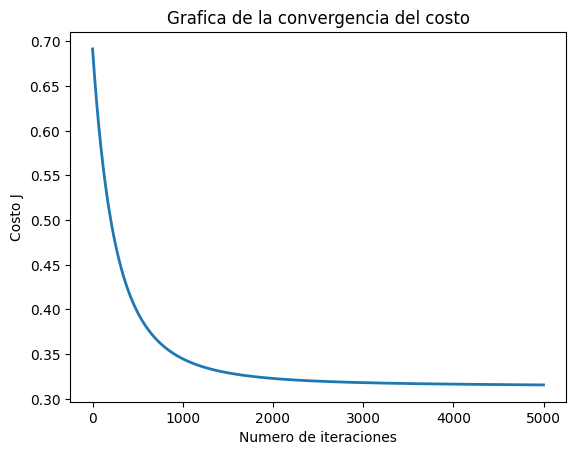

In [153]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [168]:
X_array = [1,2866,0,22,0,0,23,2,0.08695652,3,1.5,0,0,0,0,0,1,1,7.5,0.70710677,18,7.071068,1,6.0916667,4.061111,-1,0
]
X_array_copy = X_array.copy()

# Se normalizan las características para la prueba utilizando mu y sigma calculados anteriormente, excluyendo el primer valor
X_array[1:] = (X_array[1:] - mu) / sigma

# Se calcula el resultado utilizando la función sigmoid y el producto punto entre X_array y theta
resultados = sigmoid(np.dot(X_array, theta))

# Se imprime el resultado
print(f"Una persona con las características: {X_array_copy}")
print(f"Tiene una probabilidad de abandono del comercio electrónico del {resultados * 100}%")
print(f"Con valores de theta: {theta}")


Una persona con las características: [1, 2866, 0, 22, 0, 0, 23, 2, 0.08695652, 3, 1.5, 0, 0, 0, 0, 0, 1, 1, 7.5, 0.70710677, 18, 7.071068, 1, 6.0916667, 4.061111, -1, 0]
Tiene una probabilidad de abandono del comercio electrónico del 82.06337292604799%
Con valores de theta: [ 2.22624462e+00 -7.03526766e-03  5.63988929e-01  1.84632363e-01
 -2.96855719e-02 -2.89805048e-01 -2.90936303e-01 -2.15601011e-01
 -4.14726524e-02 -1.60194785e-03 -2.57320706e-02  4.21040698e-02
 -9.99020392e-03  6.52960875e-02 -2.21963024e-02 -1.15193435e-03
 -1.08853435e-02 -1.99798422e-02 -4.44661436e-02 -4.69429505e-02
  4.44858361e-03 -2.57410082e-02  5.05752407e-02  7.63788900e-03
 -3.09367556e-02 -9.75532794e-03  5.69987632e-03]


In [187]:
nombres_columnas = ['visitorid','ses_rec','ses_rec_avg','ses_rec_sd','ses_rec_cv','user_rec','ses_n','ses_n_r','int_n','int_n_r','tran_n','tran_n_r','rev_sum','rev_sum_r','major_spend_r','int_cat_n_avg','int_itm_n_avg','ses_mo_avg','ses_mo_sd','ses_ho_avg','ses_ho_sd','ses_wknd_r','ses_len_avg','time_to_int','time_to_tran','target_class','target_class 1/si 0/no'
]

import numpy as np

matriz_datos = np.array([
    [2866,0,22,0,0,23,2,0.08695652,3,1.5,0,0,0,0,0,1,1,7.5,0.70710677,18,7.071068,1,6.0916667,4.061111,-1,0],
    [724, 26, 6.3333335, 6.9442225, 1.0964562, 47, 4, 0.08510638, 13, 3.25, 0, 0, 0, 0, 0, 1, 1.5, 7, 0, 20.25, 1.5, 0, 7.0958333, 2.1833334, -1, 0],
    [89, 23, 16, 0, 0, 39, 2, 0.051282052, 3, 1.5, 0, 0, 0, 0, 0, 1, 1.5, 7, 0, 11, 7.071068, 0.5, 2.8666666, 1.9111111, -1, 0],
    [43817, 7, 0, 0, -1, 7, 2, 0.2857143, 2, 1, 0, 0, 0, 0, 0, 1, 1, 8, 0, 15, 1.4142135, 0, 0, 0, -1, 0],
    [8540,15,1.25,1.6393596,1.3114877,22,5,0.22727273,12,2.4,0,0,0,0,0,1,2.2,7.4,0.5477226,15.4,3.9115214,0.8,2.7633333,1.1513889,-1,0],
    [2656,5,0.037037037,0.18885258,5.0990195,17,28,1.6470588,38,1.3571428,0,0,0,0,0,1,1,7.892857,0.3149704,12.142858,5.6941442,0.25,1.2970238,0.95570177,-1,0],
    [89,23,16,0,0,39,2,0.051282052,3,1.5,0,0,0,0,0,1,1.5,7,0,11,7.071068,0.5,2.8666666,1.9111111,-1,0]
])

para_tabla = matriz_datos.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre = []

matriz_datos = (matriz_datos- mu) / sigma
matriz_datos = np.concatenate([np.ones((len(matriz_datos), 1)), matriz_datos], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos:
    y_pre.append(sigmoid(np.dot(j, theta)))

# Convertimos la lista a un array unidimensional

y_pre = np.array(y_pre)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral = (y_pre >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre))
para_tabla = np.column_stack((para_tabla, y_pre_umbral))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))


+-------+-------------+-----------+---------------+--------------+--------------+------------+-----------+-----------+---------+-----------+----------+------------+-----------+-------------+-----------------+-----------------+-----------------+--------------+-------------+--------------+-------------+--------------+---------------+---------------+----------------+----------------+--------------------------+
|       |   visitorid |   ses_rec |   ses_rec_avg |   ses_rec_sd |   ses_rec_cv |   user_rec |     ses_n |   ses_n_r |   int_n |   int_n_r |   tran_n |   tran_n_r |   rev_sum |   rev_sum_r |   major_spend_r |   int_cat_n_avg |   int_itm_n_avg |   ses_mo_avg |   ses_mo_sd |   ses_ho_avg |   ses_ho_sd |   ses_wknd_r |   ses_len_avg |   time_to_int |   time_to_tran |   target_class |   target_class 1/si 0/no |
+=======+=============+===========+===============+==============+==============+============+===========+===========+=========+===========+==========+============+===========+==

In [13]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)

In [14]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
--------------------------------------------------------------------------------------------------------------
   1.000  -0.717    -1.684    -0.618  -0.412  -1.067  -1.341  -0.180  -3.083    -0.117  -0.490  -0.039
   1.000  -1.734     1.145    -0.618  -0.412  -1.067  -0.311  -0.180  -0.253    -0.069   0.186  -0.039
   1.000  -0.562    -0.269     0.795   4.699   1.439   2.263   0.077  -0.340    -0.069  -0.490  -0.039
   1.000  -1.633     0.166    -0.618  -0.412  -1.067  -0.628  -0.180  -0.163    -0.117  -0.490  -0.039
   1.000   0.048     0.819    -0.618  -0.412  -1.067  -0.430  -0.180  -0.227    -0.093  -0.152  -0.039
   1.000   0.055     1.581    -0.618  -0.412  -1.067  -0.153  -0.180  -0.280    -0.117  -0.490  -0.039
   1.000   1.158     0.166     0.373  -0.412   0.020   0.045  -0.180  -0.305    -0.117  -0.490  -0.039
   1.000  -1.370    -0.052     0.346   0.885   0.548   0.679  

Calculo de Y predicha


In [31]:
y_predicha = []

# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready:
    y_predicha.append(sigmoid(np.dot(dato, theta)))

# Convertimos la lista a un array unidimensional
y_predicha = np.array(y_predicha)

# Usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral = (y_predicha >= 0.5).astype(int)

# Imprimir todos los datos de X y las predicciones
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]', 'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]', 'X[:, 19]', 'X[:, 20]', 'X[:, 21]', 'X[:, 22]', 'X[:, 23]', 'X[:, 24]', 'y_predicha', '(y) usando el umbral'
))
print('-' * 250)

# Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10d}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
        X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], X_test_ready[i, 12], X_test_ready[i, 13],
        X_test_ready[i, 14], X_test_ready[i, 15], X_test_ready[i, 16], X_test_ready[i, 17], X_test_ready[i, 18], X_test_ready[i, 19], X_test_ready[i, 20],
        X_test_ready[i, 21], X_test_ready[i, 22], X_test_ready[i, 23], X_test_ready[i, 24], y_predicha[i], y_umbral[i]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7] X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]  X[:, 18]  X[:, 19]  X[:, 20]  X[:, 21]  X[:, 22]  X[:, 23]  X[:, 24]y_predicha(y) usando el umbral
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.717    -1.684    -0.618  -0.412  -1.067  -1.341  -0.180  -3.083    -0.117    -0.490    -0.039    -0.148    -0.034    -0.096    -0.181    -0.150    -0.409     1.384    -0.670    -1.216    -1.121    -0.755    -0.492    -0.645     0.884         1
   1.000  -1.734     1.145    -0.618  -0.412  -1.067  -0.311  -0.180  -0.253    -0.069     0.186    -0.039    -0.148    -0.034    -0.096    -0.181    -0.150    -0.409    -0.348    -0.670    -0.716    -0.178    -0.755     0.37

In [32]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 89.02 %
